In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
import cv2

train_path = r"C:\Users\suchitra\OneDrive\Desktop\Rice_Image_Dataset\train"
test_path = r"C:\Users\suchitra\OneDrive\Desktop\Rice_Image_Dataset\test"

train_images = []
train_labels = []

test_images = []
test_labels = []

for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        for file in files:
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                train_images.append(img)
                train_labels.append(class_name)

for class_name in os.listdir(test_path):
    class_path = os.path.join(test_path, class_name)
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        for file in files:
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                test_images.append(img)
                test_labels.append(class_name)

print("Total train images loaded:", len(train_images))
print("Total test images loaded:", len(test_images))
print("Classes found:", set(train_labels))

Total train images loaded: 12000
Total test images loaded: 3000
Classes found: {'Basmati', 'Jasmine', 'Karacadang', 'Arborio', 'Ipsala'}


In [3]:
import numpy as np
x = np.array(train_images) / 255.0
print("x shape:", x.shape)

x shape: (12000, 224, 224, 3)


In [5]:
y = np.array(train_labels)
print("y:", y)

y: ['Arborio' 'Arborio' 'Arborio' ... 'Karacadang' 'Karacadang' 'Karacadang']


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

labelled_y = le.fit_transform(y)
labelled_y

array([0, 0, 0, ..., 4, 4, 4])

In [8]:
from tensorflow.keras.utils import to_categorical


In [9]:
onehot = to_categorical(labelled_y)
onehot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

Text(0.5, 1.0, 'Arborio')

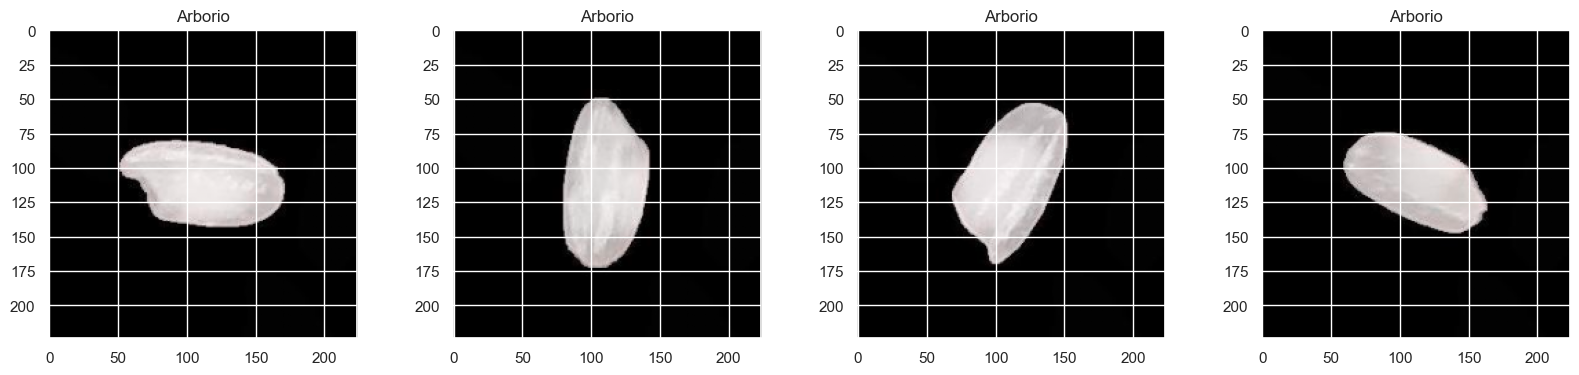

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
ax[0].imshow(x[0])
ax[0].set_title(y[0])

ax[1].imshow(x[601])
ax[1].set_title(y[601])

ax[2].imshow(x[1902])
ax[2].set_title(y[1902])

ax[3].imshow(x[2126])
ax[3].set_title(y[2126])

In [14]:
from sklearn.utils import shuffle

shuffled_x, shuffled_y = shuffle(x,onehot,random_state = 42)

In [15]:
shuffled_x = np.array(shuffled_x[:2000], dtype=np.float32) / 255.0
shuffled_y = np.array(shuffled_y[:2000])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    shuffled_x, shuffled_y, test_size=0.2, random_state=42
)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
epochs = 3
batch_size= 100
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    x_train,
    y_train,
    epochs = epochs,
    batch_size = batch_size,
    callbacks = callback,
    validation_data = (x_test, y_test),
    verbose = 2
)

Epoch 1/3
16/16 - 75s - 5s/step - accuracy: 0.2731 - loss: 1.5806 - val_accuracy: 0.4450 - val_loss: 1.4802
Epoch 2/3
16/16 - 70s - 4s/step - accuracy: 0.5656 - loss: 1.2147 - val_accuracy: 0.8925 - val_loss: 0.8394
Epoch 3/3
16/16 - 71s - 4s/step - accuracy: 0.8838 - loss: 0.5634 - val_accuracy: 0.9575 - val_loss: 0.2995


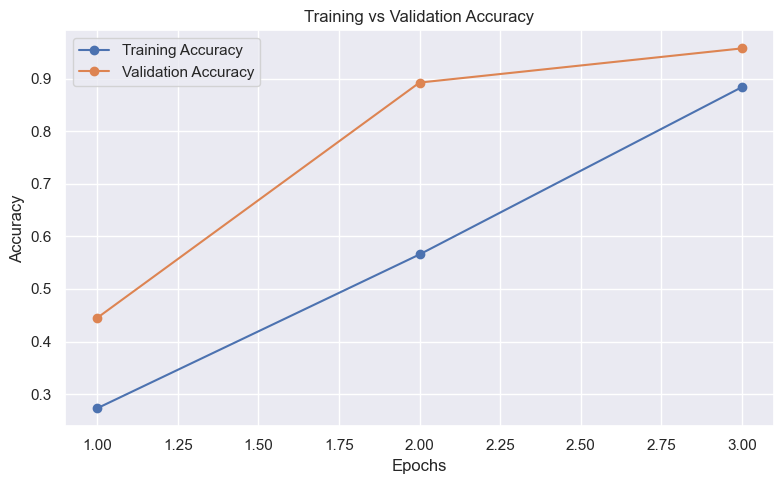

In [21]:
accu = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(accu) + 1)  # This line was missing in your code

plt.figure(figsize=(8, 5))
plt.plot(epochs, accu, label='Training Accuracy', marker='o')
plt.plot(epochs, val, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
model.save("model.h5", include_optimizer=False)

In [23]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.9596 - loss: 0.2900 


[0.2995164692401886, 0.9574999809265137]

In [24]:
y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step


In [25]:
y_predict_label = np.argmax(y_pred,axis=1)

In [26]:
y_pred_label = pd.Series(y_predict_label)

In [27]:
mapping = {
    0:'Arborio',
    1:'Basmati',
    2:'Ipsala',
    3:'Jasmine',
    4:'Karacadag'
}


In [28]:
y_predicted_classes = y_pred_label.map(mapping)

In [29]:
y_predicted_classes

0      Karacadag
1        Arborio
2        Arborio
3         Ipsala
4        Jasmine
         ...    
395      Arborio
396    Karacadag
397       Ipsala
398       Ipsala
399      Jasmine
Length: 400, dtype: object

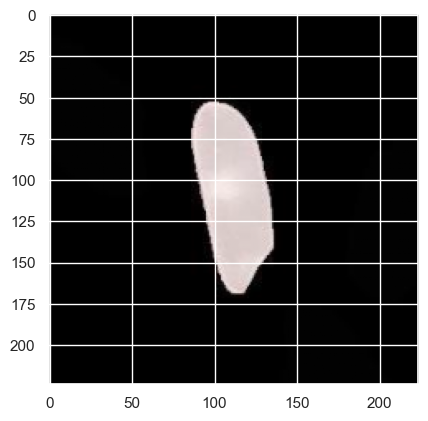

In [37]:
img_path = r"C:\Users\suchitra\OneDrive\Desktop\Rice_Image_Dataset\train\Jasmine\Jasmine (1014).jpg"

sample_img = cv2.imread(img_path)
resized_image = cv2.resize(sample_img, (224,224))

transformed_img = resized_image/255

plt.imshow(transformed_img)

In [38]:
img = np.expand_dims(transformed_img, axis=0)

output = model.predict(img)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [39]:
predict = np.argmax(output)
predict = pd.Series(predict)
predict.map(mapping)

0    Arborio
dtype: object

In [40]:
!pip freeze > requirements.txt

In [41]:
!cat requirements.txt  # shows the contents

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
!pip freeze > requirements.txt

In [43]:
!type requirements.txt

aiobotocore @ file:///C:/b/abs_431uzunk2v/croot/aiobotocore_1738237882529/work
aiohappyeyeballs @ file:///C:/b/abs_e9fm5mk6ak/croot/aiohappyeyeballs_1734469429350/work
aiohttp @ file:///C:/b/abs_d4_gdjffav/croot/aiohttp_1734687146788/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/alabaster_1729041938345/work
altair @ file:///C:/b/abs_0b1avjyzoc/croot/altair_1743016738596/work
anaconda-anon-usage @ file:///C:/b/abs_1az9wuczyu/croot/anaconda-anon-usage_1749054795139/work
anaconda-auth @ file:///C:/b/abs_66s84uss7v/croot/anaconda-cloud-auth-split_1747863792543/work
anaconda-catalogs @ file:///C:/b/abs_ac59ma63va/croot/anaconda-catalogs_1747774731997/work
anaconda-cli-base @ file:///C:/b/abs_e4_l2p3q_7/croot/anaconda-cli-base_1741369468349/work
anaconda-client @ file:///C:/b/abs_0aa49y56xo/croot/anaconda-client_1743199